# Project: Wrangling and Analyze Data

In [1]:
#Let´s first read in all libraries that will be needed for the data collection and wrangling:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import time
import json

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#The link to the csv file was provided in the instructions, so I downloaded it an uploaded it to the classroom workspace.
#Therefore I can read it in directly & have a quick look:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv') 
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#The required libraries were already read in above, requests and os.
#First, create a folder for the image predictions:
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#Now load in the data of the image predictions:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
#Request has succeeded, let's look at the content: 
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [6]:

#Now create a file with the content: 
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [7]:
#Import the created file into a data frame, delimiter is obviously a tab:
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

>Note: In order to understand how to scrape data from the Twitter API, I used the following articles for help:
https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id & 
https://docs.tweepy.org/en/v4.8.0/getting_started.html

In [8]:
#Due to issues with tweepy, a mentor told me to upgrade it to the latest version:
!pip install --upgrade tweepy==4.6.0

Requirement already up-to-date: tweepy==4.6.0 in /opt/conda/lib/python3.6/site-packages (4.6.0)


In [9]:
#Check if correct version was installed:
tweepy.__version__

'4.6.0'

In [10]:
#.Client() is only available for versions above 4.0 and is now found:
client=tweepy.Client()
client

In [12]:
#Check if credentials of Twitter developer portal work correctly:
bearer_token = 'HIDDEN'
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

client = tweepy.Client(bearer_token, consumer_key, consumer_secret, access_token, access_secret, wait_on_rate_limit=True)
client.get_me()


Response(data=<User id=1513194501136859137 name=K. Hrtmnn username=k_hrtmnn>, includes={}, errors=[], meta={})

In [13]:
#Now create API object to gather Twitter data:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [14]:
#Get tweet data & store in JSON format:
with open('tweet-json.txt', 'w', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        print(tweet._json)
        break

Forbidden: 403 Forbidden
453 - You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve

>Unfortunately there were issues with my twitter developer credentials and my rights were not sufficient. I spent a lot of time trying to fix this, but in the end nothing really worked out. In order to continue and to finish the project in time, I decided to go with the .txt file which was luckily provided by udacity in the classroom:

In [15]:
# Loop through provided json file line by line to extract and store relevant information in a list:

tweet_list = [] 

with open('tweet-json.txt', encoding='utf-8') as js_file:
    for i in js_file:
        data = json.loads(i)
        tweet_id = data['id']
        text = data['full_text']
        url = text[text.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        
        tweet_list.append({'tweet_id': tweet_id,'text':text, 'url' : url, 'favorite_count': favorite_count,'retweet_count': retweet_count})
print(tweet_list)

[{'tweet_id': 892420643555336193, 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'url': 'https://t.co/MgUWQ76dJU', 'favorite_count': 39467, 'retweet_count': 8853}, {'tweet_id': 892177421306343426, 'text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV", 'url': 'https://t.co/0Xxu71qeIV', 'favorite_count': 33819, 'retweet_count': 6514}, {'tweet_id': 891815181378084864, 'text': 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB', 'url': 'https://t.co/wUnZnhtVJB', 'favorite_count': 25461, 'retweet_count': 4328}, {'tweet_id': 891689557279858688, 'text': 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ', 'url': 'https://t.co/tD36da7qLQ', 'favorite_count':

In [16]:
# Convert to a Pandas dataframe:
tweet_data = pd.DataFrame(tweet_list)
tweet_data.head()

,favorite_count,retweet_count,text,tweet_id,url
0,39467,8853,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,https://t.co/MgUWQ76dJU
1,33819,6514,This is Tilly. She's just checking pup on you....,892177421306343426,https://t.co/0Xxu71qeIV
2,25461,4328,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,https://t.co/wUnZnhtVJB
3,42908,8964,This is Darla. She commenced a snooze mid meal...,891689557279858688,https://t.co/tD36da7qLQ
4,41048,9774,This is Franklin. He would like you to stop ca...,891327558926688256,https://t.co/AtUZn91f7f


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



> Visual assessment is the very first step in assessing data, so I´ll have a general look at each of the three tables.

In [17]:
# Show top rows of the particular table:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
# Show ten random rows of the particular table:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
615,796563435802726400,NaN,NaN,2016-11-10 04:01:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: I want to finally rate this ico...,7.809316e+17,4.196984e+09,2016-09-28 00:46:20 +0000,https://twitter.com/dog_rates/status/780931614...,13,10,None,None,None,None,puppo
1419,698342080612007937,NaN,NaN,2016-02-13 03:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. He's training for the tetherb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698342080...,11,10,Maximus,None,None,None,None
662,790987426131050500,NaN,NaN,2016-10-25 18:44:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She has a cowboy hat on her nos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790987426...,12,10,Misty,None,None,None,None
1452,695767669421768709,6.753494e+17,4.196984e+09,2016-02-06 00:35:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",If you are aware of who is making these please...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695767669...,13,10,None,None,None,None,None
1700,680959110691590145,NaN,NaN,2015-12-27 03:51:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzie. He was doing fine until he lost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680959110...,9,10,Ozzie,None,None,None,None
1372,702217446468493312,NaN,NaN,2016-02-23 19:44:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know it's tempting, but please stop sending ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/702217446...,9,10,None,None,None,None,None
1639,684177701129875456,NaN,NaN,2016-01-05 01:00:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,None,None,None,None
2251,667806454573760512,NaN,NaN,2015-11-20 20:47:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Filup. He is overcome with joy after f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667806454...,10,10,Filup,None,None,None,None
1329,705898680587526145,NaN,NaN,2016-03-04 23:32:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Max. He's a Fallopian Cephalopuff. Eyes a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705898680...,10,10,Max,None,None,None,None
1335,705239209544720384,NaN,NaN,2016-03-03 03:51:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jimothy. He lost his body during the t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705239209...,11,10,Jimothy,None,None,None,None


In [19]:
# Show top rows of the particular table:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
# Show ten random rows of the particular table:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1217,743595368194129920,https://pbs.twimg.com/media/ClHICHmXEAI_1PS.jpg,1,hippopotamus,0.505675,False,hog,0.370726,False,warthog,0.018827,False
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
924,702321140488925184,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,West_Highland_white_terrier,0.769159,True,Scotch_terrier,0.064369,True,Old_English_sheepdog,0.043763,True
923,702276748847800320,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1,Boston_bull,0.697303,True,French_bulldog,0.239015,True,American_Staffordshire_terrier,0.019838,True
637,681261549936340994,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,0.065738,True
1045,712809025985978368,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True
1411,770772759874076672,https://pbs.twimg.com/media/CrJVupHXgAA4Dkk.jpg,1,chow,0.979515,True,golden_retriever,0.010219,True,Pomeranian,0.004606,True
1367,761745352076779520,https://pbs.twimg.com/media/CpJDWqhW8AAFt45.jpg,1,paddle,0.393118,False,canoe,0.178088,False,lakeside,0.099713,False
818,692901601640583168,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,1,soft-coated_wheaten_terrier,0.403496,True,cocker_spaniel,0.135164,True,golden_retriever,0.088719,True
1172,736736130620620800,https://pbs.twimg.com/media/CjlpmZaUgAED54W.jpg,1,schipperke,0.545502,True,groenendael,0.298622,True,Labrador_retriever,0.030986,True


In [21]:
# Show top rows of the particular table:
tweet_data.head()

,favorite_count,retweet_count,text,tweet_id,url
0,39467,8853,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,https://t.co/MgUWQ76dJU
1,33819,6514,This is Tilly. She's just checking pup on you....,892177421306343426,https://t.co/0Xxu71qeIV
2,25461,4328,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,https://t.co/wUnZnhtVJB
3,42908,8964,This is Darla. She commenced a snooze mid meal...,891689557279858688,https://t.co/tD36da7qLQ
4,41048,9774,This is Franklin. He would like you to stop ca...,891327558926688256,https://t.co/AtUZn91f7f


In [22]:
# Show ten random rows of the particular table:
tweet_data.sample(10)

,favorite_count,retweet_count,text,tweet_id,url
1510,2828,747,This is Molly. She's a Peruvian Niddlewog. Lov...,691321916024623104,https://t.co/g4fiS8A9Ab
695,11957,2996,"""Honestly Kathleen I just want more Ken Bone"" ...",786664955043049472,https://t.co/HmlEvAMP4r
1231,20378,7602,This is Stubert. He just arrived. 10/10 https:...,712809025985978368,https://t.co/HVGs5aAKAn
442,8008,1383,Say hello to Anna and Elsa. They fall asleep i...,819347104292290561,https://t.co/8rUL99bX4W
1348,2031,629,Meet Stanley. He's an inverted Uzbekistani wat...,704113298707505153,https://t.co/XpYMBQ1FD8
1890,1456,488,Just received another perfect photo of dogs an...,674754018082705410,https://t.co/9YmNcxA2Cc
518,39640,13369,This is Phil. He's a father. A very good fathe...,810284430598270976,https://t.co/9p6ECXJMMu
203,0,2243,RT @dog_rates: I usually only share these on F...,852936405516943360,https://t…
725,8694,2184,This is Timmy. He's quite large. According to ...,782598640137187329,https://t.co/BIUchFwHqn
1366,3134,1091,This is a Wild Tuscan Poofwiggle. Careful not ...,702539513671897089,https://t.co/4EnShAQjv6


>Let´s take a deeper look into the data with programmatic assessment. I´ll start with the Twitter Archive data, then take a look at the image predictions and finally evaluate the Tweet data scraped from Twitter:

In [23]:
# Show information such as null values and data types:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
# Twitter Archive: Some columns contain null values, show which and how many exactly:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [25]:
# Do we have any duplicates?
twitter_archive.duplicated().sum()

0

In [26]:
# Looking at the descriptives really only makes sense for the rating columns:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
# Let´s have a closer look at the (unique) ratings because there seem to be quite extreme values:
np.sort(twitter_archive['rating_numerator'].unique())

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   17,   20,   24,   26,   27,   44,
         45,   50,   60,   75,   80,   84,   88,   99,  121,  143,  144,
        165,  182,  204,  420,  666,  960, 1776])

In [28]:
# How often do the ratings appear?
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [29]:
# I´ll do the same for the denominator, even though it is supposed to be 10 :)
np.sort(twitter_archive['rating_denominator'].unique())

array([  0,   2,   7,  10,  11,  15,  16,  20,  40,  50,  70,  80,  90,
       110, 120, 130, 150, 170])

In [30]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [31]:
# I´ll also look at the dog names since some seem to be incorrect or incomplete:
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Bailey         7
Buddy          7
Toby           7
Daisy          7
an             7
Dave           6
Jax            6
Leo            6
Milo           6
Jack           6
Rusty          6
Bella          6
Oscar          6
Stanley        6
Koda           6
Scout          6
Larry          5
            ... 
Aldrick        1
Edd            1
Marlee         1
Petrick        1
Ralphus        1
Bluebert       1
Aiden          1
Timmy          1
Franq          1
Livvie         1
Moofasa        1
Kona           1
Clarkus        1
Kevon          1
Ashleigh       1
Howie          1
Snickers       1
Bonaparte      1
Obie           1
Crawford       1
Mike           1
Vince          1
Creg           1
Harry          1
Dunkin         1
Snoop          1
Odin           1
Poppy         

>Next up: Programmatic assessment for "Image Prediction" table.

In [32]:
# Show information such as null values and data types:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
# No null values, so we can go on with duplicates:
image_prediction.duplicated().sum()

0

In [34]:
# How about the descriptives? The numeric probabilities p1, p2 and p3 are interesting to look at here:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
# Let´s also look at the value counts for the most probable dog breeds in the photos:
image_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
teddy                         18
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [36]:
image_prediction['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
miniature_pinscher                 20
toy_terrier                        20
malinois                           20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [37]:
image_prediction['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

>Last but not least: Programmatic assessment for the scraped tweet data.

In [38]:
# Show information such as null values and data types:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
text              2354 non-null object
tweet_id          2354 non-null int64
url               2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.0+ KB


In [39]:
# Again no null values, so we continue checking potential duplicates:
tweet_data.duplicated().sum()

0

In [40]:
# Descriptives are especially interesting for the numeric values favourite and retweet counts:
tweet_data.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


### Quality issues
1. Twitter archive table: Wrong data types in the following columns have to be corrected: tweet_id (int -> string), timestamp (object -> datetime), rating_numerator & rating_denumerator (int -> float)

2. Twitter archive table: Retweets and tweets without a dog rating are not relevant for the later analysis and have to be deleted.

3. Twitter archive table: Some columns are irrelevant for the analysis and should be dropped.

4. Twitter archive table: Some dog names seem incorrect or incomplete and need to be corrected.

5. Image prediction table: Numerators and denumerators seem to have some errors and/or outliers that need to be fixed.

6. Image prediction table: tweet_id column is of a wrong data type.

7. Tweet data table: tweet_id column is of a wrong data type.

8. Image prediction table: Columns used or created during cleaning & tidying are now obsolete and can be taken out.

### Tidiness issues
1. Twitter archive table: The "stages" described in the dogtionary, namely doggo, floofer, pupper and puppo form own columns, however they should be merged into one "stage" column, since each variable should form a column.
2. The scraped information in the tweet data table such as favorite and retweet count should be merged with the information in the twitter archive table, as well as the image predictions. All this information is related to tweets, which are identifiable through their id, and therefore belongs together (rule: each type of observational unit should form a table).

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [41]:
# Make copies of original pieces of data in order to preserve them:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_data_clean = tweet_data.copy()

### [Q] Issue #1: Twitter archive table - Wrong data types in the some columns have to be corrected.

#### Define:
- Convert tweet_id from int to string, 
- Convert timestamp from object to datetime, 
- Convert rating_numerator & rating_denumerator from int to float.

#### Code

In [42]:
# Convert tweet_id
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

In [43]:
# Convert timestamp
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [44]:
# Convert numerator and denumerator:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator','rating_denominator']].astype(float)

#### Test

In [45]:
# Verify that the column were assigned the correct datatypes:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[

### [Q] Issue #2: Twitter archive table - Retweets (without a dog rating) are not relevant for the later analysis and have to be deleted.

#### Define:
Take out retweets by filtering out the null values of retweet_status_id.

#### Code

In [46]:
#Delete retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

#### Test

In [47]:
# Verify there are zero non-nulls:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1)

### [Q] Issue #3: Twitter archive table - Some columns are irrelevant for the analysis and should be dropped.

#### Define:
Drop the following columns, which are now obsolete and are not needed for later analysis:
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls    

#### Code

In [48]:
# Drop obsolete columns:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], axis=1)

#### Test

In [49]:
# Check if obsolete columns are gone:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 203.9+ KB


### [Q] Issue #4: Twitter archive table - Some dog names seem incorrect or incomplete and need to be corrected.

#### Define:
Correct dog names and replace diverging names with "None".

#### Code

In [50]:
twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [51]:
twitter_archive_clean['name'].value_counts()

None        784
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Lola          8
Toby          7
Daisy         7
Jax           6
Koda          6
Oscar         6
Bo            6
Bailey        6
Stanley       6
Bella         6
Buddy         5
Dave          5
Milo          5
Leo           5
Rusty         5
Chester       5
Scout         5
Louis         5
Bentley       5
Reggie        4
Sammy         4
           ... 
Bluebert      1
Harlso        1
Rover         1
Canela        1
Beebop        1
Howie         1
Ashleigh      1
Kevon         1
Jim           1
Geno          1
Gert          1
Pherb         1
Einstein      1
Sundance      1
Dewey         1
Cal           1
Brandy        1
Maks          1
Mason         1
Clarkus       1
Goliath       1
Flash         1
Blanket       1
Stormy        1
Timmy         1
Livvie        1
Moofasa       1
Gordon        1
Banditt       1
Loomis        1
Name: name, Length: 931,

### [Q] Issue #5: Image prediction table - Numerators and denumerators seem to have some errors and/or outliers that need to be fixed.

#### Define:
Correct rating numerators which were extracted wrongly from the text since they contain decimals.

#### Code

In [52]:
# Show rows that contain text with decimals:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [53]:
# Correct the values for the numerator:
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == "883482846933004288"), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == "786709082849828864"), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == "778027034220126208"), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == "681340665377193984"), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == "680494726643068929"), 'rating_numerator'] = 11.26

#### Test

In [54]:
# Confirm modifications:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


### [Q] Issue #6: Image prediction table: tweet_id column is of a wrong data type.

#### Define:
Convert tweet_id from int to string.

#### Code

In [55]:
image_prediction_clean.tweet_id = image_prediction_clean.tweet_id.astype(str)

#### Test

In [56]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### [Q] Issue #7: Tweet data table - tweet_id column is of a wrong data type.

#### Define:
Convert tweet_id from int to string.

#### Code

In [57]:

tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.astype(str)

#### Test

In [58]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
text              2354 non-null object
tweet_id          2354 non-null object
url               2354 non-null object
dtypes: int64(2), object(3)
memory usage: 92.0+ KB


### [T] Issue #1: Twitter archive table: The "stages" should be merged into one "stage" column, since each variable should form a column.

#### Define:
Join the four stage categories in one new column and mark the records with more than one stage as "Multiple".

#### Code

In [59]:
# Create a new column with all four stage columns combined:
twitter_archive_clean['stage_combined'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [60]:
# Confirm that new column was added:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_combined
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,NoneNoneNoneNone
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,NoneNoneNoneNone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,NoneNoneNoneNone
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,NoneNoneNoneNone
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,NoneNoneNoneNone


In [61]:
# Evaluate the combinations of stages:
twitter_archive_clean.stage_combined.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage_combined, dtype: int64

In [62]:
# Set up function to sort by stage in a new column:
def check_stages(twitter_archive):
    if twitter_archive['stage_combined'].count('None') == 2:
        return 'Multiple'
    else:
        if twitter_archive['stage_combined'].count('doggo') == 1:
            return 'Doggo'
        elif twitter_archive['stage_combined'].count('floofer') == 1:
            return 'Floofer'
        elif twitter_archive['stage_combined'].count('pupper') == 1:
            return 'Pupper'
        elif twitter_archive['stage_combined'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

twitter_archive_clean['stage'] = twitter_archive_clean.apply(check_stages, axis=1)

#### Test

In [63]:
# Verify existence of new column & correct content:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
stage_combined        2175 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 237.9+ KB


In [64]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage_combined,stage
2153,669661792646373376,2015-11-25 23:39:47,"<a href=""http://twitter.com/download/iphone"" r...",This is a brave dog. Excellent free climber. T...,5.0,10.0,None,None,None,None,None,NoneNoneNoneNone,None
2349,666051853826850816,2015-11-16 00:35:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,2.0,10.0,None,None,None,None,None,NoneNoneNoneNone,None
584,800141422401830912,2016-11-20 00:59:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Peaches. She's the ultimate selfie sid...,13.0,10.0,Peaches,None,None,None,None,NoneNoneNoneNone,None
193,855459453768019968,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",12.0,10.0,None,None,None,None,None,NoneNoneNoneNone,None
1174,720059472081784833,2016-04-13 01:22:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Charleson. He lost his plunger. Looked...,9.0,10.0,Charleson,None,None,None,None,NoneNoneNoneNone,None
1188,718454725339934721,2016-04-08 15:05:29,"<a href=""http://twitter.com/download/iphone"" r...",This pic is old but I hadn't seen it until tod...,13.0,10.0,None,None,None,None,None,NoneNoneNoneNone,None
1622,684914660081053696,2016-01-07 01:49:14,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes I'll just get one of each color tha...",12.0,10.0,None,None,None,None,None,NoneNoneNoneNone,None
1457,695095422348574720,2016-02-04 04:03:57,"<a href=""http://twitter.com/download/iphone"" r...",This is just a beautiful pupper good shit evol...,12.0,10.0,None,None,None,pupper,None,NoneNonepupperNone,Pupper
1732,679828447187857408,2015-12-24 00:58:27,"<a href=""http://twitter.com/download/iphone"" r...",Everybody look at this beautiful pupper 13/10 ...,13.0,10.0,None,None,None,pupper,None,NoneNonepupperNone,Pupper
701,786051337297522688,2016-10-12 03:50:17,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,13.0,10.0,None,None,None,None,puppo,NoneNoneNonepuppo,Puppo


### [Q] Issue #8: Ultimately used or created columns obsolete for analysis can be taken out.

#### Define:
Drop obsolete columns doggo, floofer, pupper, puppo, stage_combined.

#### Code

In [65]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'stage_combined'], axis=1, inplace=True)

#### Test

In [66]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None


### [T] Issue #2: The scraped information in the tweet data table such as favorite and retweet count should be merged with the information in the twitter archive table, as well as the image predictions.

#### Define:
Merge the three clean tables twitter_archive, image_predictions and tweet_data_clean. 

#### Code

In [67]:
# Use pandas merge function to join the tables in two steps with a left merge:
df_twitter_dogs = pd.merge(left=twitter_archive_clean, right=tweet_data_clean, how='left', on='tweet_id')

In [68]:
# Check impact of first merge:
df_twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text_x                2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
favorite_count        2175 non-null int64
retweet_count         2175 non-null int64
text_y                2175 non-null object
url                   2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 220.9+ KB


In [69]:
# Now merge the third table:
df_twitter_dogs = pd.merge(left=df_twitter_dogs, right=image_prediction_clean, how='left', on='tweet_id')

#### Test

In [70]:
df_twitter_dogs.head()

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,39467,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,33819,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,25461,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,42908,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,41048,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [71]:
df_twitter_dogs.columns

Index(['tweet_id', 'timestamp', 'source', 'text_x', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'favorite_count',
       'retweet_count', 'text_y', 'url', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [72]:
df_twitter_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text_x                2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
favorite_count        2175 non-null int64
retweet_count         2175 non-null int64
text_y                2175 non-null object
url                   2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    

#### Define #2
Since there are several options to merge tables, I will try a second one - An inner merge. Afterwards I can compare the results (left merge vs inner merge) and go with the merged data frame that has more retained data.

#### Code #2

In [73]:
# Test how dataset would look like with an inner merge:
df_twitter_dogs2 = pd.merge(left=twitter_archive_clean, right=tweet_data_clean, how='inner', on='tweet_id')

In [74]:
# Verify if first (inner) merge has worked out:
df_twitter_dogs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text_x                2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
favorite_count        2175 non-null int64
retweet_count         2175 non-null int64
text_y                2175 non-null object
url                   2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 220.9+ KB


In [75]:
# Second (inner) merge:
df_twitter_dogs2 = pd.merge(left=df_twitter_dogs2, right=image_prediction_clean, how='inner', on='tweet_id')

#### Test #2

In [76]:
# Check how newly created table looks like:
df_twitter_dogs2.head()

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,39467,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,33819,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,25461,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,42908,8964,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,41048,9774,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [77]:
df_twitter_dogs2.columns

Index(['tweet_id', 'timestamp', 'source', 'text_x', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'favorite_count',
       'retweet_count', 'text_y', 'url', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [78]:
df_twitter_dogs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text_x                1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
stage                 1994 non-null object
favorite_count        1994 non-null int64
retweet_count         1994 non-null int64
text_y                1994 non-null object
url                   1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 n

> Apparently a bit more data was "lost" in the inner join (result: df_twitter_dogs2), so the left join merge table is the one I will continue to work with (result: df_twitter_dogs).

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
df_twitter_dogs.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

> Since I will work with the newly created master file which is stored in the workspace in the following section, I will not touch or change anything of the above in this workbook. This is why I decided to start from zero and import all required libraries again, so I can restart the kernel without having to run all cells in the whole notebook again.

In [80]:
# Import all libraries needed for analysis and visualization:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# Read in recently created master file with Pandas:
df_master = pd.read_csv('twitter_archive_master.csv')

In [82]:
# Look at dataframe to come up with research questions:
df_master.head(10)

,tweet_id,timestamp,source,text_x,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,39467,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,33819,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,25461,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,42908,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,41048,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13.0,10.0,None,None,20562,3261,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,12041,2158,...,1.0,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13.0,10.0,None,None,56848,16716,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None,28226,4429,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,Doggo,32467,7711,...,1.0,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [83]:
# Check for datatypes and missing values:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text_x                2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
favorite_count        2175 non-null int64
retweet_count         2175 non-null int64
text_y                2175 non-null object
url                   2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-

In [84]:
# Correct datatypes which were changed due to saving merged dataframe to a .csv file:
df_master.tweet_id = df_master.tweet_id.astype(str)
df_master.timestamp = pd.to_datetime(df_master.timestamp)
df_master.rating_numerator = df_master.rating_numerator.astype(float)
df_master.rating_denominator = df_master.rating_denominator.astype(float)
df_master.stage = df_master.stage.astype("category")
df_master.favorite_count = df_master.favorite_count.astype(int)
df_master.retweet_count = df_master.retweet_count.astype(int)

In [85]:
# Verify that corrections are implemented:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text_x                2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null category
favorite_count        2175 non-null int64
retweet_count         2175 non-null int64
text_y                2175 non-null object
url                   2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                  

### Research Questions

#### 1. Dog stages 
How frequent are the single stages (used) which are defined in the Dogtionary?


In [86]:
# Use value_counts function to display the distribution of the dog stages:
distr_stages = df_master.stage.value_counts()
distr_stages

None        1831
Pupper       224
Doggo         75
Puppo         24
Multiple      12
Floofer        9
Name: stage, dtype: int64

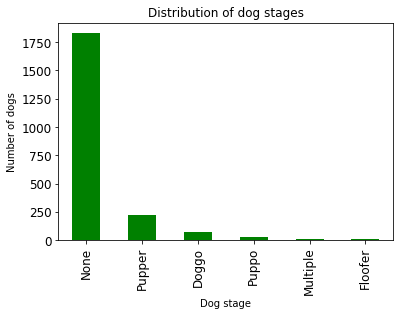

In [87]:
# Visualize distribution and add labels:
distr_stages.plot.bar(color='green', fontsize = 12)

plt.title('Distribution of dog stages')
plt.xlabel('Dog stage')
plt.ylabel('Number of dogs');

#### 2. (Predicted) Dog races 
How are different dog races distributed over the tweets and which are the most frequent ones?

In [88]:
# I#ll use the value count function to show all races predicted as mostly probable (p1) in the photos:
pred_races = df_master.p1.value_counts()
pred_races

golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
beagle                        17
Cardigan                      17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
Lakeland_terrier              16
kuvasz                        16
web_site                      15
          

In [89]:
# Okay, there are a lot of weird races or wrong entries. Let's look at the top 10 only:
top_races = df_master.p1.value_counts()[1:10]
top_races

Labrador_retriever    95
Pembroke              88
Chihuahua             79
pug                   54
chow                  41
Samoyed               40
toy_poodle            38
Pomeranian            38
malamute              29
Name: p1, dtype: int64

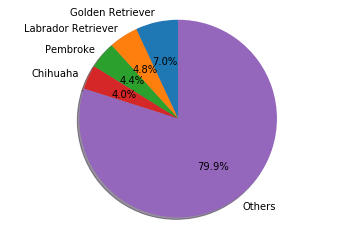

In [90]:
# I will visualize the top four breeds vs. all others manually with percentages in a pie chart:
labels = 'Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuaha', 'Others'
sizes = [139, 95, 88, 79, 1593]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

I used the following Matplotlib page for help: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

#### 3. Development of likes
How did likes on the WeRateDogs account developed over time?


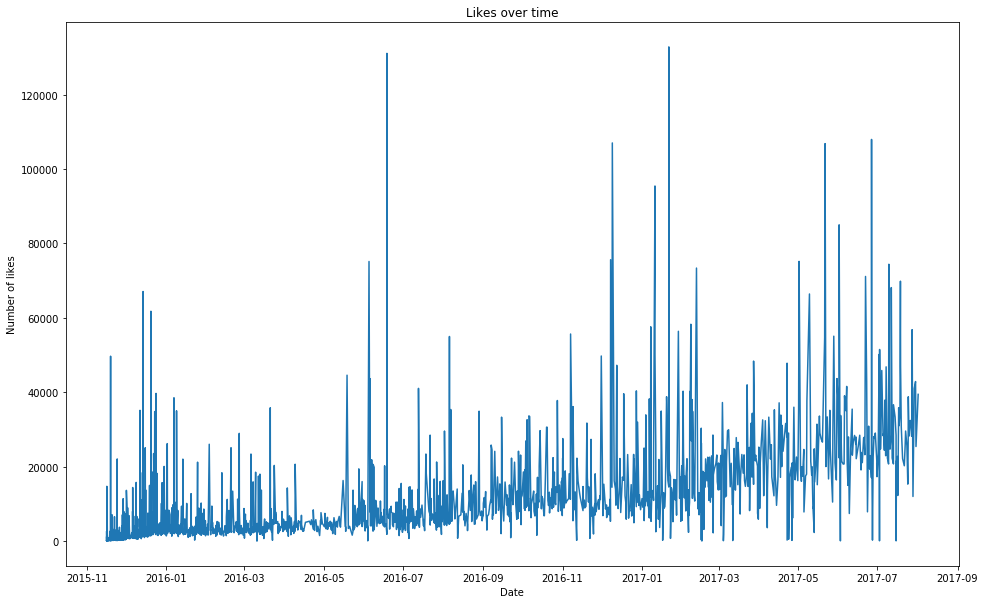

In [91]:
# Let's plot the likes (represented by favorite_count) over time:
sns.set_context()
plt.subplots(figsize=(16, 10))
plt.plot(df_master.timestamp, df_master.favorite_count)
plt.title('Likes over time')
plt.xlabel('Date')
plt.ylabel('Number of likes');

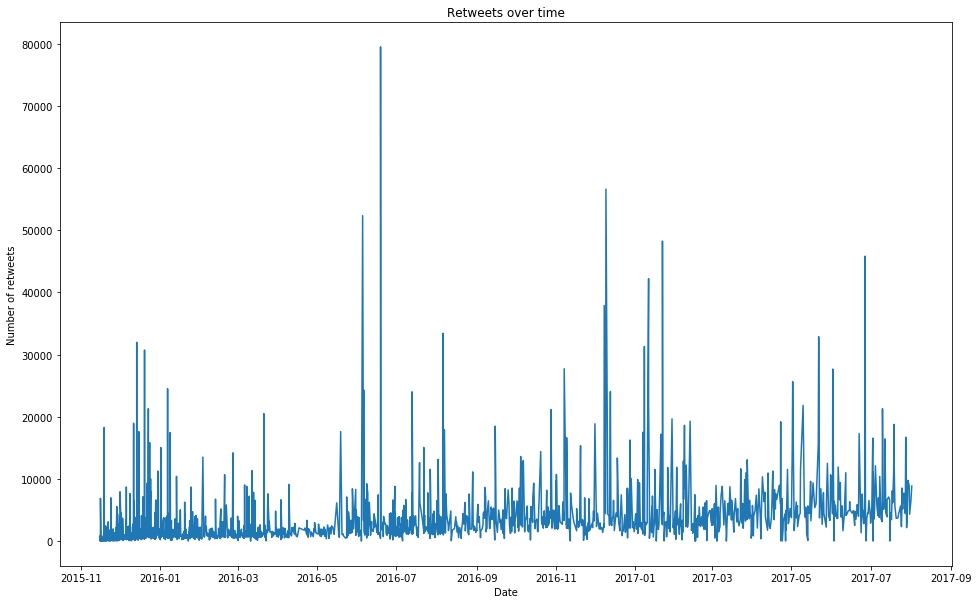

In [92]:
# We can do the same with the retweets, just for fun:
sns.set_context()
plt.subplots(figsize=(16, 10))
plt.plot(df_master.timestamp, df_master.retweet_count)
plt.title('Retweets over time')
plt.xlabel('Date')
plt.ylabel('Number of retweets');

#### 4. Correlation of likes and retweets 
Is there any relation between the behavior of giving a like to a tweet and retweeting it?


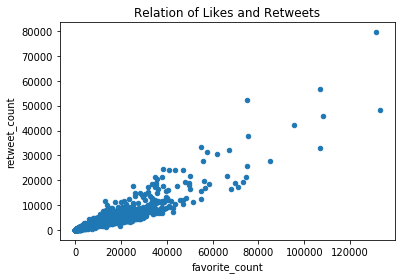

In [93]:
# Plot favorite_count and retweet_count columns:
df_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Relation of Likes and Retweets');

In [94]:
# Verify the correlation with calculation of r-value:
df_master['favorite_count'].corr(df_master['retweet_count'])

0.91173165335641071

### Insights:
1. **Dog stages:** Apparently, a minority of tweets actually contain the dog stage. Therefore it is to assume, that most twitter users were not really familiar with the dogtionary and its stages. Taking out the tweets without stage label and looking at the remaining tweets with a stage label would give more detailed insight into the distribution. However, the numbers and the visualization already tell us, that the majority of tweets that used a dog stage contained puppers, so younger, probably inexperienced and clumsy dogs. 

2. **Dog races:** Even though the (predicted) dog races in posted pictures varied a lot and there seems to be more cleaning effort needed to take out wrong labels/not existing races, the four top races are quite clear: Golden and labrador retrievers as well as Pembrokes and Chihuahas make up around 20% of all dogs in pictures. Side fact: I actually had to google what a Pembroke looked like, it appears to be a Corgi, which became famous as the favorite dogs of the Queen of England.

3. **Development of likes over time**: As we can see in the chart, there is a slight trend upwards in likes, starting beginning of 2017. In the year 2017, the average like amount lays somewhere around 30.000. At a few points in time, even more than 100.000 likes were reached temporarily. However, there have been clear ups and also downs along the years displayed. The retweets show a comparable, slightly positive development, yet on a much lower level (around 1000).

3. **Correlation of favorite tweets and predicted dog race**: There seems to be a positive correlation between likes and retweets, what - translated to behavior - mean that the probability of retweeting is higher if a user also gives a like to a tweet. This is supported by the r-value which is close to 1 and therefore also suggests a positive correlation between the variables.


>Reminder to myself: Take out Twitter account information before submitting the project :)